# Prepare Dataset

In [883]:
# Load data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path="/content/drive/My Drive/praktikum-ml/WineQT.csv"

Mounted at /content/drive


# Import Library

In [884]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# Data Visualization

In [885]:
# Dataframe
df=pd.read_csv(path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [886]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [887]:
# num_col is column array
num_col = df.select_dtypes(include=np.number)
num_col.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [888]:
# Checking correlation
corr = num_col.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


Intepretation
1. The quality of wine is related to volatile acidity.
2. The quality of wine highly corelated to alcohol.

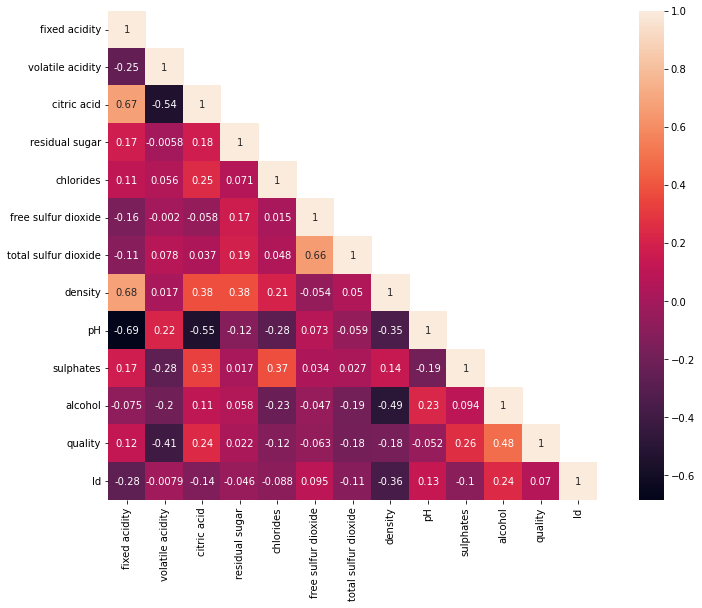

In [889]:
# Plotting
# If ~0 means there is no linear correlation
# If ~1 means there is positive correlation: If a up, then b up
# If ~-1 means there is negative correlation: If a up, then b down

cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15, 9)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

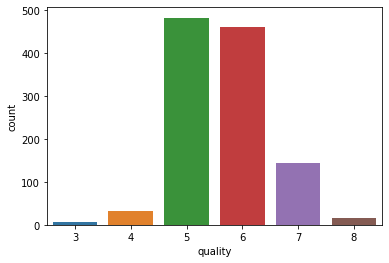

In [890]:
sns.countplot(x='quality',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


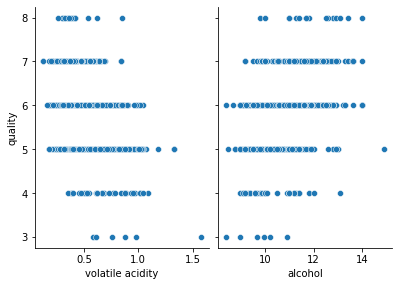

In [891]:
sns.pairplot(df, x_vars=['volatile acidity','alcohol'], y_vars='quality', size=4, aspect=0.7)

In [892]:
# Checking null-entry
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [893]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# Remove Outlier

In [895]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

fixed acidity             2.000000
volatile acidity          0.247500
citric acid               0.330000
residual sugar            0.700000
chlorides                 0.020000
free sulfur dioxide      14.000000
total sulfur dioxide     40.000000
density                   0.002275
pH                        0.195000
sulphates                 0.180000
alcohol                   1.600000
quality                   1.000000
Id                      798.500000
dtype: float64


In [896]:
# The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(834, 13)

# Standardization

In [897]:
# StandardScaler is useful for the features that follow a normal distribution.
# MinMaxScaler may be used when the upper and lower boundaries.
scaler = preprocessing.MinMaxScaler().fit(df)
df = scaler.transform(df)
df

array([[3.33333333e-01, 6.55367232e-01, 0.00000000e+00, ...,
        1.48936170e-01, 3.33333333e-01, 0.00000000e+00],
       [3.91304348e-01, 8.58757062e-01, 0.00000000e+00, ...,
        2.34042553e-01, 3.33333333e-01, 6.26174076e-04],
       [3.91304348e-01, 7.23163842e-01, 5.47945205e-02, ...,
        2.34042553e-01, 3.33333333e-01, 1.25234815e-03],
       ...,
       [1.59420290e-01, 5.42372881e-01, 1.09589041e-01, ...,
        3.82978723e-01, 3.33333333e-01, 9.98121478e-01],
       [1.15942029e-01, 4.85875706e-01, 1.36986301e-01, ...,
        5.31914894e-01, 6.66666667e-01, 9.98747652e-01],
       [1.15942029e-01, 5.93220339e-01, 1.64383562e-01, ...,
        3.19148936e-01, 3.33333333e-01, 1.00000000e+00]])

In [898]:
df.shape

(834, 13)

In [899]:
df = pd.DataFrame(df,columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.333333,0.655367,0.000000,0.291667,0.448718,0.243902,0.247788,0.636364,0.766234,0.359375,0.148936,0.333333,0.000000
1,0.391304,0.858757,0.000000,0.583333,0.730769,0.585366,0.539823,0.522727,0.363636,0.546875,0.234043,0.333333,0.000626
2,0.391304,0.723164,0.054795,0.458333,0.653846,0.341463,0.424779,0.545455,0.441558,0.500000,0.234043,0.333333,0.001252
3,0.884058,0.180791,0.767123,0.291667,0.435897,0.390244,0.477876,0.659091,0.311688,0.390625,0.234043,0.666667,0.001879
4,0.333333,0.655367,0.000000,0.291667,0.448718,0.243902,0.247788,0.636364,0.766234,0.359375,0.148936,0.333333,0.002505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,0.173913,0.440678,0.178082,0.458333,0.448718,0.682927,0.300885,0.402273,0.649351,0.656250,0.489362,0.666667,0.996869
830,0.246377,0.564972,0.109589,0.291667,0.346154,0.658537,0.283186,0.489773,0.649351,0.765625,0.170213,0.666667,0.997495
831,0.159420,0.542373,0.109589,0.333333,0.628205,0.756098,0.336283,0.306818,0.688312,0.390625,0.382979,0.333333,0.998121
832,0.115942,0.485876,0.136986,0.416667,0.269231,0.926829,0.398230,0.331818,0.779221,0.671875,0.531915,0.666667,0.998748


# Model 1 - Multi Linear Regression 73% Accuracy

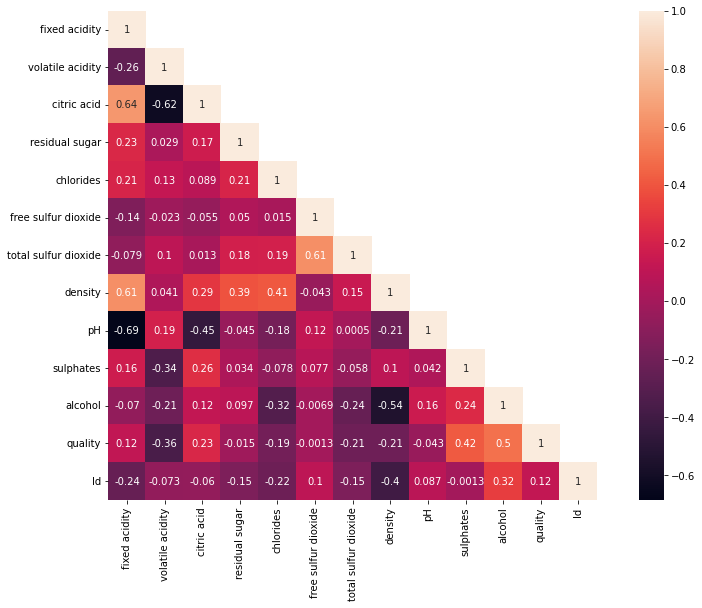

In [900]:
# Plotting
# If ~0 means there is no linear correlation
# If ~1 means there is positive correlation: If a up, then b up
# If ~-1 means there is negative correlation: If a up, then b down

cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15, 9)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [901]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.333333,0.655367,0.000000,0.291667,0.448718,0.243902,0.247788,0.636364,0.766234,0.359375,0.148936,0.333333,0.000000
1,0.391304,0.858757,0.000000,0.583333,0.730769,0.585366,0.539823,0.522727,0.363636,0.546875,0.234043,0.333333,0.000626
2,0.391304,0.723164,0.054795,0.458333,0.653846,0.341463,0.424779,0.545455,0.441558,0.500000,0.234043,0.333333,0.001252
3,0.884058,0.180791,0.767123,0.291667,0.435897,0.390244,0.477876,0.659091,0.311688,0.390625,0.234043,0.666667,0.001879
4,0.333333,0.655367,0.000000,0.291667,0.448718,0.243902,0.247788,0.636364,0.766234,0.359375,0.148936,0.333333,0.002505


In [902]:
X = df[['sulphates','volatile acidity','alcohol']]
y = df['quality']

In [903]:
# If the dataset is relatively small (n < 10,000), 70:30 would be a suitable choice.
# If the dataset is smaller datasets (n < 1,000), k-fold cross-validation would be a suitable choice (try 10-fold).

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [904]:
reg_linear = LinearRegression(fit_intercept=True, positive=True).fit(X_train, y_train)

In [905]:
y_pred =  reg_linear.predict(X_test)

In [906]:
print("Classification Report")
print(classification_report(np.round(y_test), np.round(y_pred))) # Round because what we have is continuous number
print("Confusion Matrix")
print(confusion_matrix(np.round(y_test), np.round(y_pred)))
print()
print()
print("Mean Absolute Error")
print(MAE(np.round(y_test), np.round(y_pred)))
print()
print("Mean Squared Error") # A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean)
print(MSE(np.round(y_test), np.round(y_pred))) # MSE 0.29 > 10% * Mean Quality of Wine (5.657043 -> 0.57)
print()
print("R-Squared Score")
print(r2_score(np.round(y_test), np.round(y_pred)))
print()
print("Coefficient")
print(reg_linear.coef_)
print()
print("Intercept")
print(reg_linear.intercept_)
print()
print("Theta")
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X, y, rcond=1e-6)
print(theta_best_svd)
print()

Classification Report
              precision    recall  f1-score   support

         0.0       0.65      0.75      0.70       106
         1.0       0.80      0.70      0.75       145

    accuracy                           0.73       251
   macro avg       0.72      0.73      0.72       251
weighted avg       0.74      0.73      0.73       251

Confusion Matrix
[[ 80  26]
 [ 43 102]]


Mean Absolute Error
0.2749003984063745

Mean Squared Error
0.2749003984063745

R-Squared Score
-0.12680546519193236

Coefficient
[0.4200495  0.         0.51109887]

Intercept
0.16373780495436896

Theta
[0.63143991 0.07272544 0.57002275]



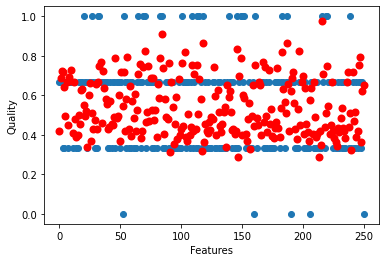

In [907]:
X_test=np.arange(0,len(X_test),1)
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,color='red',linewidth=2)
plt.xlabel('Features')
plt.ylabel('Quality')
plt.show()

# Model 2 - Simple Linear Regression 71% Accuracy

In [908]:
X = df['alcohol']
y = df['quality']

In [909]:
# If the dataset is relatively small (n < 10,000), 70:30 would be a suitable choice.
# If the dataset is smaller datasets (n < 1,000), k-fold cross-validation would be a suitable choice (try 10-fold).

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [910]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [911]:
simple_reg_linear = LinearRegression().fit(X_train, y_train)

In [912]:
coeff_df = pd.DataFrame({'Coefficient': simple_reg_linear.coef_.ravel()})
coeff_df.index = ['alcohol']
coeff_df

# If alcohol increase, 1.01 increase in the quality of the wine.

,Coefficient
alcohol,0.602389


In [913]:
y_pred =  simple_reg_linear.predict(X_test.values.reshape(-1,1))

In [914]:
print("Classification Report")
print(classification_report(np.round(y_test), np.round(y_pred))) # Round because what we have is continuous number
print("Confusion Matrix")
print(confusion_matrix(np.round(y_test), np.round(y_pred)))
print()
print()
print("Mean Absolute Error")
print(MAE(np.round(y_test), np.round(y_pred)))
print()
print("Mean Squared Error") # A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean)
print(MSE(np.round(y_test), np.round(y_pred))) # MSE 0.29 > 10% * Mean Quality of Wine (5.657043 -> 0.57)
print()
print("R-Squared Score")
print(r2_score(np.round(y_test), np.round(y_pred)))
print()
print("Coefficient")
print(simple_reg_linear.coef_)
print()
print("Intercept")
print(simple_reg_linear.intercept_)
print()
print("Theta")
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X.values.reshape(-1, 1), y.values.reshape(-1, 1), rcond=1e-6)
print(theta_best_svd)
print()

Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.72      0.67       106
         1.0       0.77      0.70      0.73       145

    accuracy                           0.71       251
   macro avg       0.70      0.71      0.70       251
weighted avg       0.71      0.71      0.71       251

Confusion Matrix
[[ 76  30]
 [ 44 101]]


Mean Absolute Error
0.2948207171314741

Mean Squared Error
0.2948207171314741

R-Squared Score
-0.20845803513337668

Coefficient
[[0.60238866]]

Intercept
[0.32970742]

Theta
[[1.2993209]]



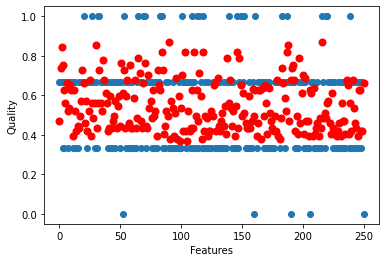

In [915]:
X_test=np.arange(0,len(X_test),1)
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,color='red',linewidth=2)
plt.xlabel('Features')
plt.ylabel('Quality')
plt.show()

# Model 3 - Gradient Descent 71% Accuracy
## Batch Gradient Descent

In [916]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2)  # random initialization
theta

array([-1.11188012,  0.31890218])

In [917]:
X.to_numpy()

array([0.14893617, 0.23404255, 0.23404255, 0.23404255, 0.14893617,
       0.14893617, 0.14893617, 0.27659574, 0.17021277, 0.10638298,
       0.25531915, 0.38297872, 0.21276596, 0.17021277, 0.14893617,
       0.21276596, 0.12765957, 0.17021277, 0.14893617, 0.23404255,
       0.29787234, 0.23404255, 0.10638298, 0.44680851, 0.21276596,
       0.12765957, 0.10638298, 0.10638298, 0.14893617, 0.14893617,
       0.14893617, 0.31914894, 0.19148936, 0.27659574, 0.14893617,
       0.10638298, 0.12765957, 0.23404255, 0.42553191, 0.38297872,
       0.17021277, 0.10638298, 0.38297872, 0.42553191, 0.29787234,
       0.10638298, 0.08510638, 0.34042553, 0.29787234, 0.19148936,
       0.06382979, 0.19148936, 0.42553191, 0.23404255, 0.06382979,
       0.31914894, 0.06382979, 0.10638298, 0.14893617, 0.10638298,
       0.12765957, 0.17021277, 0.23404255, 0.21276596, 0.17021277,
       0.38297872, 0.27659574, 0.46808511, 0.10638298, 0.17021277,
       0.38297872, 0.91489362, 0.19148936, 0.10638298, 0.19148

In [918]:
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance
X_b

array([[1.        , 0.14893617],
       [1.        , 0.23404255],
       [1.        , 0.23404255],
       ...,
       [1.        , 0.38297872],
       [1.        , 0.53191489],
       [1.        , 0.31914894]])

In [919]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [920]:
X_b.shape

(834, 2)

In [921]:
y.shape

(834,)

In [922]:
theta.shape

(2,)

In [923]:
(X_b.dot(theta)).shape

(834,)

In [924]:
(X_b.dot(theta) - y).shape

(834,)

In [925]:
(X_b.T.dot(X_b.dot(theta) - y)).shape

(2,)

In [926]:
theta.shape

(2,)

In [927]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_b, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

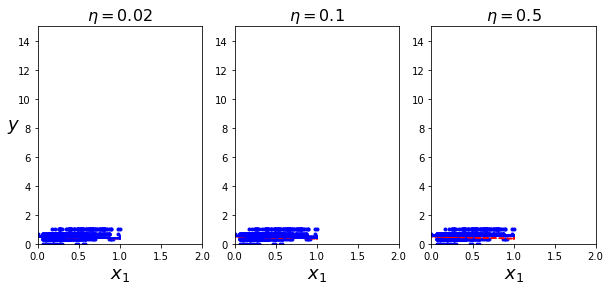

In [928]:
np.random.seed(42)
theta = np.random.randn(2)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

In [929]:
# If the dataset is relatively small (n < 10,000), 70:30 would be a suitable choice.
# If the dataset is smaller datasets (n < 1,000), k-fold cross-validation would be a suitable choice (try 10-fold).

X_train,X_test,y_train,y_test= train_test_split(X_b,y,train_size=0.7,test_size=0.3,random_state=42)

In [930]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_train, y_train)

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [931]:
y_pred_sgd = sgd_reg.predict(X_test)

In [932]:
print("Classification Report")
print(classification_report(np.round(y_test), np.round(y_pred_sgd))) # Round because what we have is continuous number
print("Confusion Matrix")
print(confusion_matrix(np.round(y_test), np.round(y_pred_sgd)))
print()
print()
print("Mean Absolute Error")
print(MAE(np.round(y_test), np.round(y_pred_sgd)))
print()
print("Mean Squared Error") # A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean)
print(MSE(np.round(y_test), np.round(y_pred_sgd))) # MSE 0.29 > 10% * Mean Quality of Wine (5.657043 -> 0.57)
print()
print("R-Squared Score")
print(r2_score(np.round(y_test), np.round(y_pred_sgd)))
print()
print("Coefficient")
print(sgd_reg.coef_)
print()
print("Intercept")
print(sgd_reg.intercept_)
print()

Classification Report
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66       106
         1.0       0.76      0.74      0.75       145

    accuracy                           0.71       251
   macro avg       0.71      0.71      0.71       251
weighted avg       0.71      0.71      0.71       251

Confusion Matrix
[[ 71  35]
 [ 37 108]]


Mean Absolute Error
0.2868525896414343

Mean Squared Error
0.2868525896414343

R-Squared Score
-0.1757970071567989

Coefficient
[0.17604127 0.56966871]

Intercept
[0.17604127]

